In [6]:
!pip install logomaker

DEPRECATION: Loading egg at /share/CADD/users/users/linchen/anaconda3/lib/python3.11/site-packages/rfdiffusion-1.1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 4.2 MB/s eta 0:00:0000:0100:01


In [7]:
from Bio import SeqIO
from collections import Counter
import pandas as pd
import numpy as np
import logomaker
import matplotlib.pyplot as plt

<Figure size 2000x600 with 0 Axes>

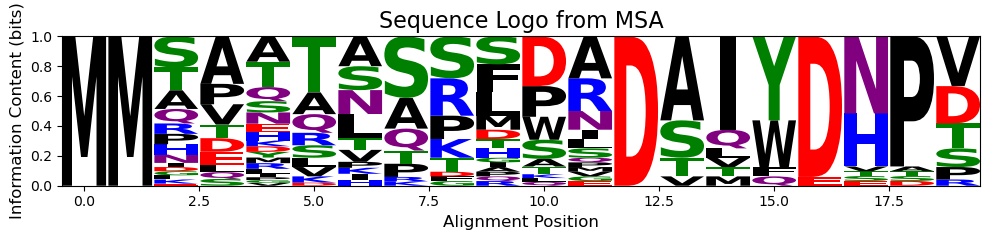

In [33]:

msa_file = "EKWA0PSC211-alignment.fa" 
records = list(SeqIO.parse(msa_file, "fasta"))

# ========= 计算氨基酸频率矩阵 =========
aa_list = list("ACDEFGHIKLMNPQRSTVWY")  # 20种氨基酸
msa_len = len(records[0].seq)
msa = [record.seq for record in records]
freq_matrix = []

for i in range(20):
# for i in range(msa_len):
    column = [seq[i] for seq in msa if seq[i] != '-']  # 忽略gap
    counter = Counter(column)
    total = sum(counter.values())
    freq = {aa: counter.get(aa, 0)/total for aa in aa_list}
    freq_matrix.append(freq)

df_freq = pd.DataFrame(freq_matrix)

# ========= 计算信息熵与保守性 =========
entropy = -(df_freq.replace(0, np.nan) * np.log2(df_freq.replace(0, np.nan))).sum(axis=1)
max_entropy = np.log2(len(aa_list))
info_content = max_entropy - entropy  # 每个位点的信息量（保守性）

# 信息量乘以频率 → 每种氨基酸的显示高度
# logo_matrix = df_freq.multiply(info_content, axis=0)
logo_matrix = df_freq
# ========= 绘制 Sequence Logo =========
plt.figure(figsize=(20,6))
logomaker.Logo(
    logo_matrix,
    color_scheme='chemistry',  # 可选配色：'chemistry'/'hydrophobicity'/'charge'
    fade_below=0.5,
    shade_below=0.5
)
plt.title("Sequence Logo from MSA", fontsize=16)
plt.xlabel("Alignment Position", fontsize=12)
plt.ylabel("Information Content (bits)", fontsize=12)
plt.tight_layout()
plt.show()
# 每一列的 总高度 = 保守性 (Information Content)
# 每种氨基酸的相对高度 = 该位点中的频率
# 越高 → 越保守；越平 → 越多样
# 不同颜色对应不同的化学性质（极性、带电、疏水等）

<<class 'Bio.Align.MultipleSeqAlignment'> instance (92272 records of length 1252) at 1499ff2864d0>

In [ ]:
# Identity	相同氨基酸数 / 总长度
# Similarity	根据 BLOSUM62 等矩阵打分，保守替换也计分
from Bio.SubsMat import MatrixInfo

blosum62 = MatrixInfo.blosum62
seq1 = "QPLTGV"
seq2 = "EPLTGA"

score = 0
for a, b in zip(seq1, seq2):
    if a == b:
        score += 1  # 完全相同算1
    else:
        pair = (a,b)
        # BLOSUM62是对称矩阵，只存了一半
        if pair not in blosum62:
            pair = (b,a)
        score += blosum62.get(pair, -1)  # 默认-1
print("Similarity score (BLOSUM62):", score)

Similarity score (BLOSUM62): 6


/fastone/users/linchen/anaconda3/lib/python3.11/site-packages/Bio/SubsMat/__init__.py:126: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  warnings.warn(


In [44]:
blosum62

{('W', 'F'): 1,
 ('L', 'R'): -2,
 ('S', 'P'): -1,
 ('V', 'T'): 0,
 ('Q', 'Q'): 5,
 ('N', 'A'): -2,
 ('Z', 'Y'): -2,
 ('W', 'R'): -3,
 ('Q', 'A'): -1,
 ('S', 'D'): 0,
 ('H', 'H'): 8,
 ('S', 'H'): -1,
 ('H', 'D'): -1,
 ('L', 'N'): -3,
 ('W', 'A'): -3,
 ('Y', 'M'): -1,
 ('G', 'R'): -2,
 ('Y', 'I'): -1,
 ('Y', 'E'): -2,
 ('B', 'Y'): -3,
 ('Y', 'A'): -2,
 ('V', 'D'): -3,
 ('B', 'S'): 0,
 ('Y', 'Y'): 7,
 ('G', 'N'): 0,
 ('E', 'C'): -4,
 ('Y', 'Q'): -1,
 ('Z', 'Z'): 4,
 ('V', 'A'): 0,
 ('C', 'C'): 9,
 ('M', 'R'): -1,
 ('V', 'E'): -2,
 ('T', 'N'): 0,
 ('P', 'P'): 7,
 ('V', 'I'): 3,
 ('V', 'S'): -2,
 ('Z', 'P'): -1,
 ('V', 'M'): 1,
 ('T', 'F'): -2,
 ('V', 'Q'): -2,
 ('K', 'K'): 5,
 ('P', 'D'): -1,
 ('I', 'H'): -3,
 ('I', 'D'): -3,
 ('T', 'R'): -1,
 ('P', 'L'): -3,
 ('K', 'G'): -2,
 ('M', 'N'): -2,
 ('P', 'H'): -2,
 ('F', 'Q'): -3,
 ('Z', 'G'): -2,
 ('X', 'L'): -1,
 ('T', 'M'): -1,
 ('Z', 'C'): -3,
 ('X', 'H'): -1,
 ('D', 'R'): -2,
 ('B', 'W'): -4,
 ('X', 'D'): -1,
 ('Z', 'K'): 1,
 ('F', 'A'): -

In [ ]:
# 构建进化树

In [ ]:
# 聚类去冗余：
# 聚类的时候需要去掉前面的alignment中的-，
# bash命令去除：sed 's/-//g'  input.fasta > output.fasta

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
msa_file = "EKWA0PSC211-alignment.fa"
# 输出去掉 gap 的文件
output_file = "output_nogap.fasta"

# 读取 MSA
records = list(SeqIO.parse(msa_file, "fasta"))

# 去掉 gap
nogap_records = []
for rec in records:
    seq_str = str(rec.seq).replace("-", "")
    if '|' in rec.id: # 为了看起来方便，只保留中间id作为每一个序列的description
        new_id = rec.id.split('|')[1]
    else:
        new_id = rec.id
    nogap_rec = SeqRecord(Seq(seq_str), id=new_id, description=new_id)
    nogap_records.append(nogap_rec)

# 写出去掉gap的FASTA
SeqIO.write(nogap_records, output_file, "fasta")


# 安装：conda install -c bioconda mmseqs2
# bash命令：mmseqs easy-cluster output_nogap.fasta cluster_db tmp --min-seq-id 0.7 -c 0.8
# --min-seq-id 0.7 → 最低序列相似度（70%）
# -c 0.8 → 比对覆盖度（coverage，0.8表示两序列必须有至少80%区域被比对）

# 输出：cluster.tsv（簇代表与成员映射），TSV格式易导入Pandas分析。

# cluster_db_rep_seq.fasta得到去除冗余后的代表性序列
# cluster_db_cluster.tsv代表性序列和其他序列的对应关系。

100